In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib import pyplot as plt
from wordcloud import WordCloud

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello World !' + color.END)

# **Обзор слияний и поглощений технологических компаний**

# 1. Первичный анализ и обработка набора данных 

## 1.1. Обзор содержимого



> Используем датасет [Merger and Acquisitions by Tech Companies](https://www.kaggle.com/shivamb/company-acquisitions-7-top-companies). Набор данных содержит список покупок крупными компаниями более мелких компаний с указанием года покупки, стоимости покупки и других характеристик. 



Загрузим набор данных и выведем первые строки в качестве примера

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/company acquisitions dataset/acquisitions_update_2021.csv')
data.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


Выведем подробную информацию о наборе данных, его объеме и содержимом

In [ ]:
print(data.info())
data.describe(include = ['int', 'object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1455 non-null   int64 
 1   Parent Company     1455 non-null   object
 2   Acquisition Year   1455 non-null   object
 3   Acquisition Month  1455 non-null   object
 4   Acquired Company   1455 non-null   object
 5   Business           1455 non-null   object
 6   Country            1455 non-null   object
 7   Acquisition Price  1455 non-null   object
 8   Category           1455 non-null   object
 9   Derived Products   1455 non-null   object
dtypes: int64(1), object(9)
memory usage: 113.8+ KB
None


,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
count,1455.000000,1455,1455,1455,1455,1455,1455,1455,1455,1455
unique,NaN,14,47,13,1452,865,26,229,10,236
top,NaN,Microsoft,2014,Jun,"Disneyland, Inc.",-,-,-,-,-
freq,NaN,258,100,148,2,274,1114,945,1445,1052
mean,728.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,420.166634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,364.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,728.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1091.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Из представленного анализа видно, что набор данных:
- Содержит 1455 строк и 10 колонок
- Все значащие колонки содержат строчные данные
- Несмотря на данные анализа, визуально можно понять, что набор данных имеет пропущенные значения. обозначенные пропуском `-`

> Набор данных содержит следующие колонки:
- `ID` - идентификатор покупки компании 
- `Parent Company` - компания-покупатель
- `Acquisition Year` - год покупки
-	`Acquisition Month` - месяц покупки
-	`Acquired Company` - купленная компания
-	`Business` - род деятельности / цель покупки
-	`Country` - страна купленной компании
-	`Acquisition Price` - цена покупки
-	`Category` - категория компании
-	`Derived Products` - производные продукты



## 1.2. Обработка пропущенных значений

Оценим количество пропусков в наборе данных

In [ ]:
data.isna().sum()

ID                   0
Parent Company       0
Acquisition Year     0
Acquisition Month    0
Acquired Company     0
Business             0
Country              0
Acquisition Price    0
Category             0
Derived Products     0
dtype: int64

Видно, что на самом деле пропущенные значения заполнены символом `-`. Сделаем так, чтобы такие значения действительно заполнялись значением `NaN`, чтобы у нас не портились графики.

In [ ]:
# заменить в каждой колонке значения '-' значениями NaN
data = data.replace('-', np.NaN)

Снова проверим количество пропущенных значений:

In [ ]:
data.isna().sum()

ID                      0
Parent Company          0
Acquisition Year       28
Acquisition Month      58
Acquired Company        0
Business              274
Country              1114
Acquisition Price     945
Category             1445
Derived Products     1052
dtype: int64

Видно, что на самом деле некоторые колонки (`Country`, `Acquisition Price`, `Category`, `Derived Products`) заполнены меньше, чем на треть от общего объема данных. Большой вопрос, стоит ли их использовать для визуализации данных.

## 1.3. Преобразование набора данных

Так как в основном анализ данных будет проводиться относительно года покупки компании, удалим те записи, в которых поле `Acquisition Year` пропущено:

In [ ]:
data = data[data['Acquisition Year'].notna()]

... и преобразуем данную колонку в целочисленный тип для верной визуализации на графиках:

In [ ]:
data['Acquisition Year'] = data['Acquisition Year'].astype(int)

Количество уникальных лет, когда была совершена покупка:

In [ ]:
data['Acquisition Year'].nunique()

46

# 2. Визуализация данных

## 2.1. Сколько компании покупали в каждые годы?

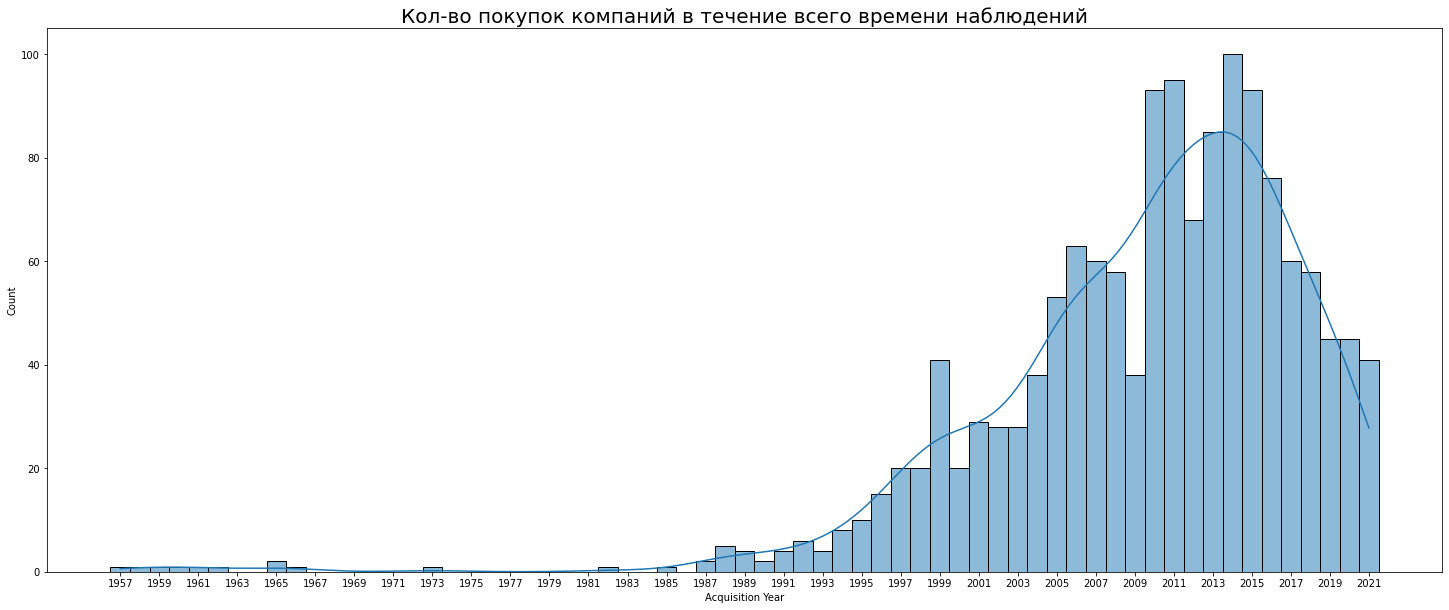

In [ ]:
dims = (25, 10)
fig, ax = plt.subplots(figsize=dims)
fig1 = sns.histplot(x = data['Acquisition Year'], ax = ax, kde = True, discrete = True)
fig1.set_xticks(range(data['Acquisition Year'].min(), data['Acquisition Year'].max()+1, 2))
fig1.set_title("Кол-во покупок компаний в течение всего времени наблюдений", {'fontsize' : 20})
fig1

> На графике видно, что исторически с развитием технологий активность рынка (интенсивность покупок) безусловно увеличилась. Также можно отметить следующее наблюдение:
- После 2013 года активность покупок упала. Это может быть связано с мировой экономической ситуацией.
- Также модно сделать предположение, что вместо количества увеличилось "качество" покупок, т.е. после 2013 года крупные игроки достаточно "насытились", и теперь покуали "редко, но метко".


Проанализируем второе предположение далее

## 2.2. Сколько компании тратили на покупки?

### 2.2.1. Преобразование данных

In [ ]:
# заменить в каждой колонке значения '-' значениями NaN
data = data.replace('undisclosed', np.NaN)

In [ ]:
data.isna().sum()

ID                      0
Parent Company          0
Acquisition Year        0
Acquisition Month      30
Acquired Company        0
Business              274
Country              1087
Acquisition Price    1049
Category             1417
Derived Products     1024
dtype: int64

In [ ]:
known_price_data = data[data['Acquisition Price'].notna()]

In [ ]:
known_price_data['Acquisition Price'] = known_price_data['Acquisition Price'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 2.2.2. Общая сумма покупок за все годы

In [ ]:
yearly_sum = known_price_data.groupby('Acquisition Year').sum()

,ID,Acquisition Price
Acquisition Year,,
1957,1385,562500
1960,1386,7500000
1982,1388,42600000
1987,670,14000000
1989,306,476000000
1994,1882,567676000
1995,1534,716567000
1996,4097,19212423000
1997,3968,2645000000


In [ ]:
yearly_sum.to_csv('yearly_sum.csv')

In [ ]:
yearly_sum = pd.read_csv('yearly_sum.csv')

,Acquisition Year,ID,Acquisition Price
0,1957,1385,562500
1,1960,1386,7500000
2,1982,1388,42600000
3,1987,670,14000000
4,1989,306,476000000
5,1994,1882,567676000
6,1995,1534,716567000
7,1996,4097,19212423000
8,1997,3968,2645000000
9,1998,3559,1345000000


In [ ]:
yearly_sum['Acquisition Price'] = yearly_sum['Acquisition Price'].astype(int)
yearly_sum['Acquisition Year'] = yearly_sum['Acquisition Year'].astype(int)

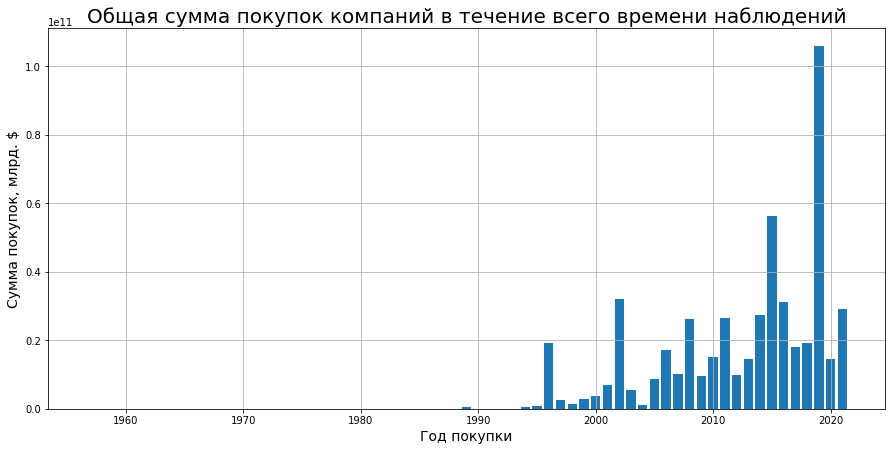

In [ ]:
plt.figure(figsize = (15,7))
plt.bar(yearly_sum['Acquisition Year'], yearly_sum['Acquisition Price'])
plt.xlabel('Год покупки', fontsize=14)
plt.ylabel('Сумма покупок, млрд. $', fontsize=14)
plt.title('Общая сумма покупок компаний в течение всего времени наблюдений', {'fontsize' : 20})
plt.grid()
plt.show()

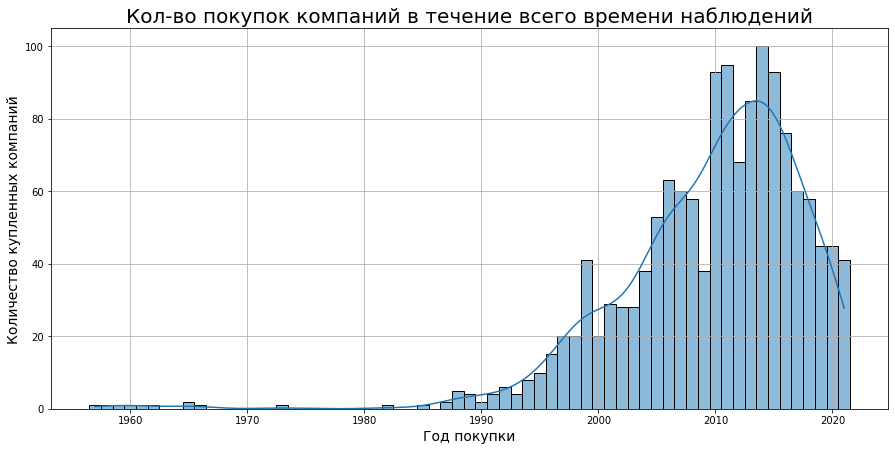

In [ ]:
dims = (15, 7)
fig, ax = plt.subplots(figsize=dims)
fig1 = sns.histplot(x = data['Acquisition Year'], ax = ax, kde = True, discrete = True)
plt.grid()
fig1.set_title("Кол-во покупок компаний в течение всего времени наблюдений", {'fontsize' : 20})
plt.xlabel('Год покупки', fontsize=14)
plt.ylabel('Количество купленных компаний', fontsize=14)
fig1

> Действительно, получается так, что зачастую покупки случались реже, но сама сумма покупки была больше, т.е. покупались более ценные компании, стоящие своих денег.



### 2.2.3. Распределение покупок среди всех компаний

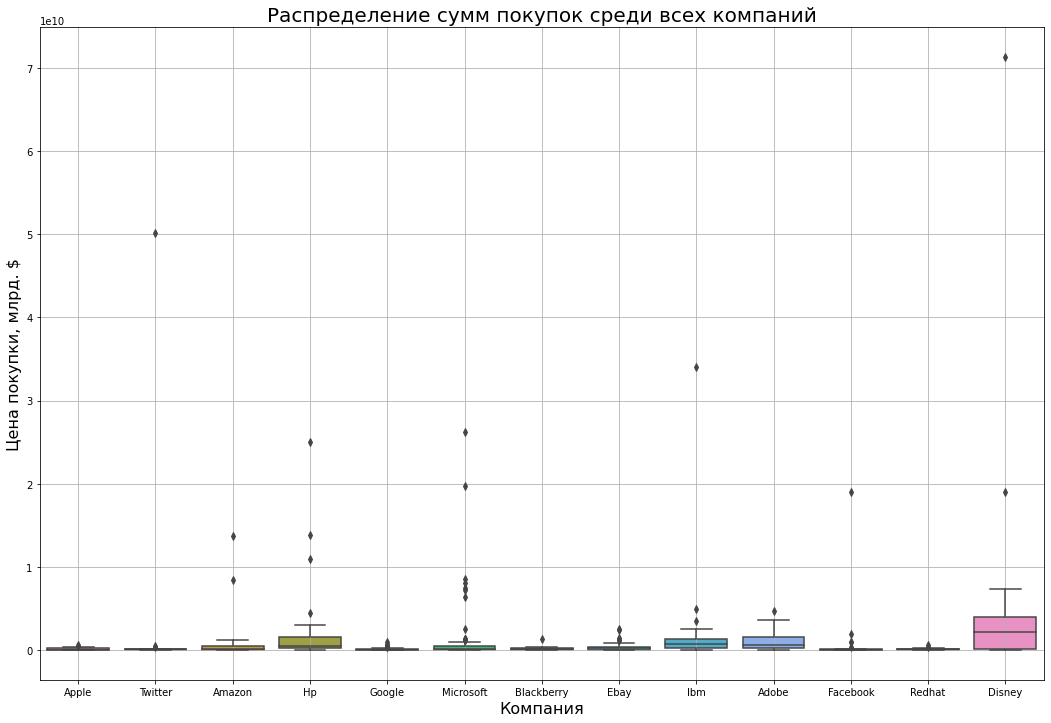

In [ ]:
dims = (18, 12)
fig, ax = plt.subplots(figsize=dims)
fig1 = sns.boxplot( x = known_price_data["Parent Company"], y = known_price_data["Acquisition Price"])
fig1.set_title('Распределение сумм покупок среди всех компаний', {'fontsize' : 20})
plt.grid()
plt.xlabel('Компания', fontsize=16)
plt.ylabel('Цена покупки, млрд. $', fontsize=16)
fig1

In [ ]:
print(color.BOLD + 'Топ-5 самых дорогих покупок:\n' + color.END)
known_price_data.sort_values('Acquisition Price', ascending = False)[:5][['Parent Company', 'Acquisition Year', 'Acquired Company', 'Business', 'Acquisition Price']]

Топ-5 самых дорогих покупок:



,Parent Company,Acquisition Year,Acquired Company,Business,Acquisition Price
1402,Disney,2019,21st Century Fox,NaN,71300000000
168,Twitter,2015,Periscope,Live-video streaming,50100000000
1190,Ibm,2019,Red Hat,Provider of open source software and solutions,34000000000
872,Microsoft,2016,LinkedIn,Professional social network,26200000000
350,Hp,2002,Compaq,Personal computer,25000000000


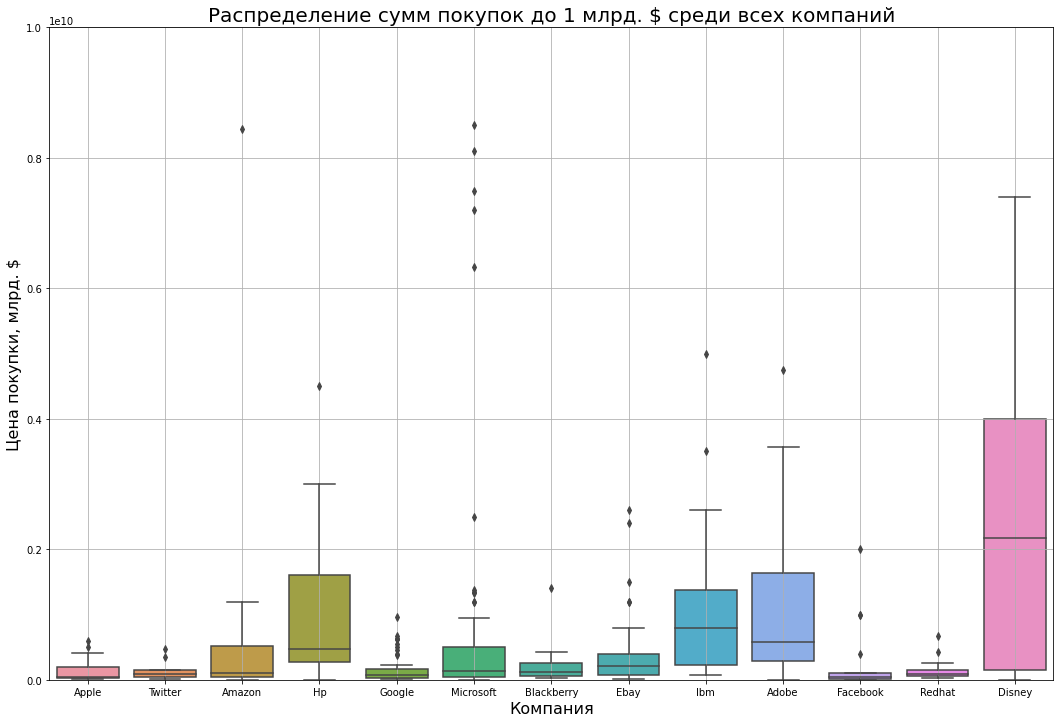

In [ ]:
dims = (18, 12)
fig, ax = plt.subplots(figsize=dims)
fig1 = sns.boxplot( x = known_price_data["Parent Company"], y = known_price_data["Acquisition Price"])
fig1.set_title('Распределение сумм покупок до 1 млрд. $ среди всех компаний', {'fontsize' : 20})
plt.grid()
ax.set_ylim(bottom = 0, top = 1*(10**10))
plt.xlabel('Компания', fontsize=16)
plt.ylabel('Цена покупки, млрд. $', fontsize=16)
fig1

## 2.3. Обзор недавних покупок среди крупных компаний

> Проведем обзор покупок компаний за предыдущие 5 лет (с 2017 года), а затем "крупных игроков", т.е. те компании, которые совершали больше всего покупок, и проанализируем их отдельно.

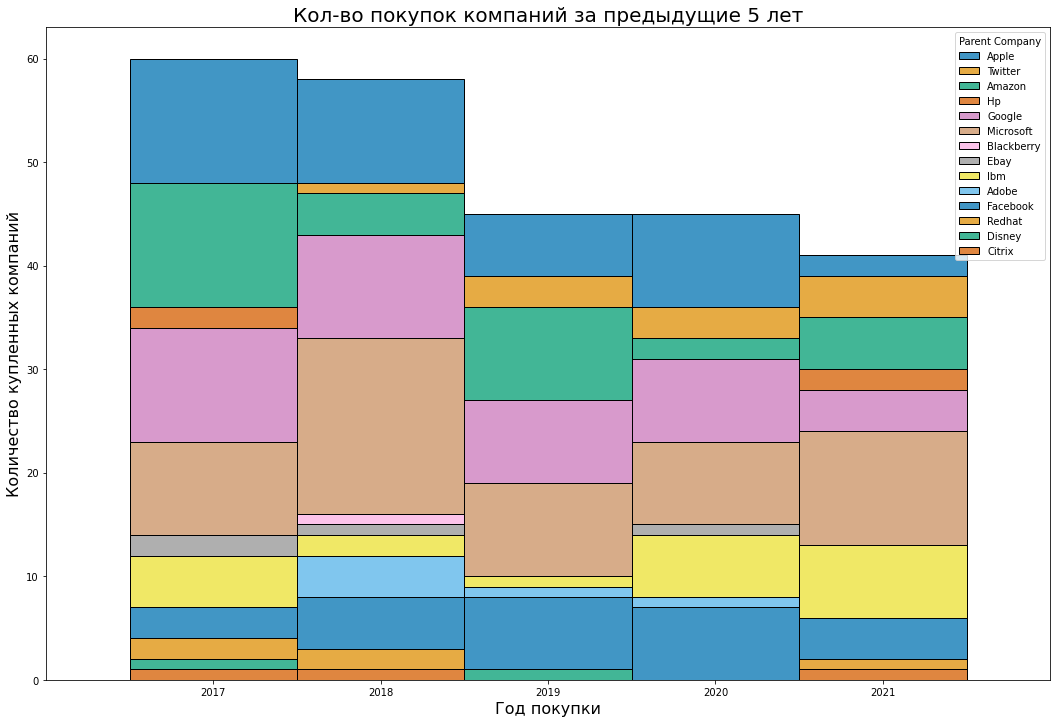

In [ ]:
dims = (18, 12)
fig, ax = plt.subplots(figsize=dims)
ax.set_xlim(2016,data['Acquisition Year'].max()+1)
fig1 = sns.histplot(x = data.loc[data['Acquisition Year'] >= 2017, 'Acquisition Year'], ax = ax, binwidth = 1, hue = data['Parent Company'], multiple='stack', discrete = True, palette = 'colorblind')
fig1.set_xticks(range(2017, data['Acquisition Year'].max()+1, 1))
fig1.set_title("Кол-во покупок компаний за предыдущие 5 лет", {'fontsize' : 20})
plt.xlabel('Год покупки', fontsize=16)
plt.ylabel('Количество купленных компаний', fontsize=16)
fig1

> Из графика видно, что большинство компаний со временем снизили количество своих покупок. Это, безусловно, связано с мировой экономической ситуацией.

### 2.3.1. Выделение крупных игроков

> Выделим компании, у которых число покупок выше среднего. Такие компании будем считать **крупными игроками**.

In [ ]:
print(color.BOLD + 'Кол-во покупок среди всех компаний с 2017 года:\n' + color.END)
data.loc[data['Acquisition Year'] >= 2017, ['Parent Company']].value_counts()

Кол-во покупок среди всех компаний с 2017 года:



Parent Company
Microsoft         54
Google            41
Apple             39
Amazon            32
Facebook          26
Ibm               21
Twitter           11
Adobe              6
Redhat             5
Ebay               4
Hp                 4
Citrix             3
Disney             2
Blackberry         1
dtype: int64

In [ ]:
print(color.BOLD + 'Среднее кол-во покупок среди всех компаний с 2017 года:\n' + color.END)
np.average(data.loc[data['Acquisition Year'] >= 2017, ['Parent Company']].value_counts())

Среднее кол-во покупок среди всех компаний с 2017 года:



17.785714285714285

> Изучив предыдущие выкладки, выделим первые 6 компаний, т.к. они имеют болье 17-ти покупок. Составим список крупных игроков.

In [ ]:
data.loc[data['Acquisition Year'] >= 2017, ['Parent Company']].value_counts()[:6]

Parent Company
Microsoft         54
Google            41
Apple             39
Amazon            32
Facebook          26
Ibm               21
dtype: int64

In [ ]:
big_player_2017_list = ['Microsoft', 'Google', 'Apple', 'Amazon', 'Facebook', 'Ibm']

In [ ]:
data_2017 = data.loc[data['Acquisition Year'] >= 2017]

In [ ]:
big_player_data_2017 = data_2017.loc[data_2017['Parent Company'].isin(big_player_2017_list)]

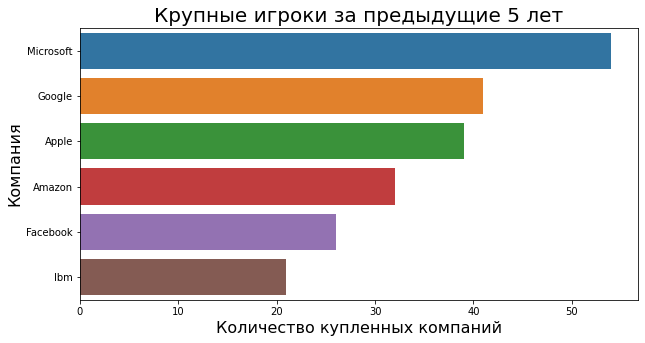

In [ ]:
dims = (10, 5)
fig1, ax = plt.subplots(figsize=dims)
#ax.set_xlim(2016,big_player_data_2017['Acquisition Year'].max()+1)
fig1 = sns.countplot(y = big_player_data_2017['Parent Company'], ax = ax, order = big_player_data_2017['Parent Company'].value_counts().index)
#fig1.set_xticks(range(2017, big_player_data_2017['Acquisition Year'].max()+1, 1))
fig1.set_title('Крупные игроки за предыдущие 5 лет', {'fontsize' : 20})
plt.xlabel('Количество купленных компаний', fontsize=16)
plt.ylabel('Компания', fontsize=16)
fig1

### 2.3.2. Обзор покупок за 5 лет

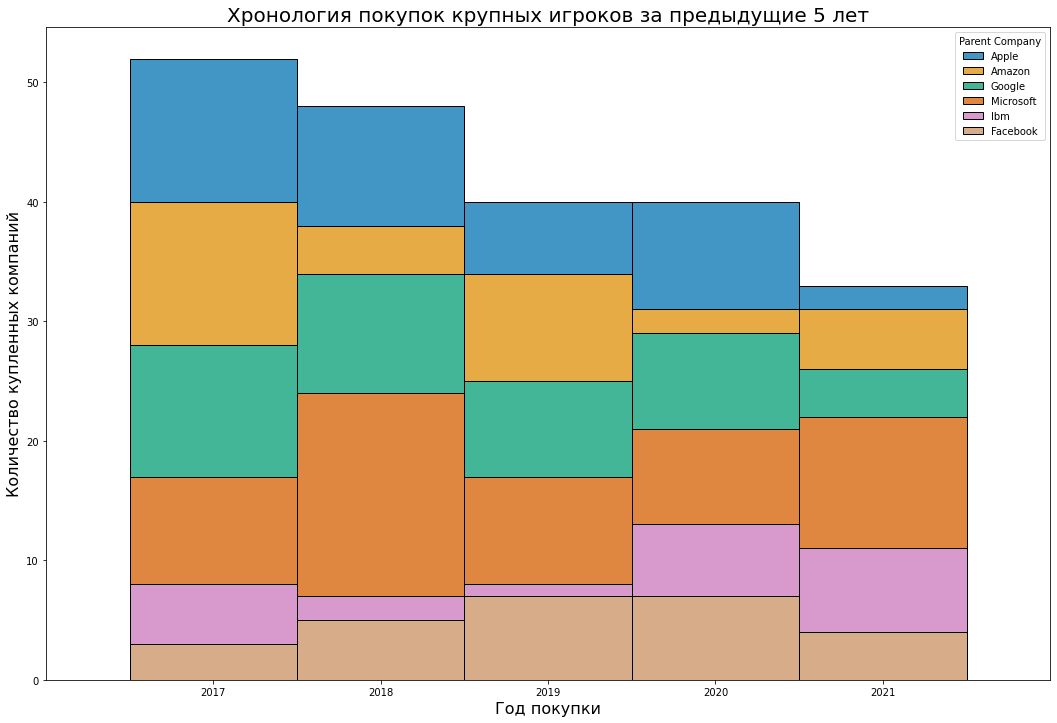

In [ ]:
dims = (18, 12)
fig, ax = plt.subplots(figsize=dims)
ax.set_xlim(2016,big_player_data_2017['Acquisition Year'].max()+1)
fig1 = sns.histplot(x = big_player_data_2017['Acquisition Year'], ax = ax, binwidth = 1, hue = big_player_data_2017['Parent Company'], multiple='stack', discrete = True, palette = 'colorblind')
fig1.set_xticks(range(2017, big_player_data_2017['Acquisition Year'].max()+1, 1))
fig1.set_title('Хронология покупок крупных игроков за предыдущие 5 лет', {'fontsize' : 20})
plt.xlabel('Год покупки', fontsize=16)
plt.ylabel('Количество купленных компаний', fontsize=16)
fig1

> Из графика видна предыдущая общая тенденция на снижение кол-ва покупок, а также другое интересное наблюдение:
- компания IBM начала наращивать кол-во покупок компаний

### 2.3.3. Обзор покупаемых технологий среди крупных игроков

In [ ]:
text = " ".join(business for business in big_player_data_2017.Business.dropna())
print ("Обнаружено {} слов.".format(len(text)))

Обнаружено 4328 слов.


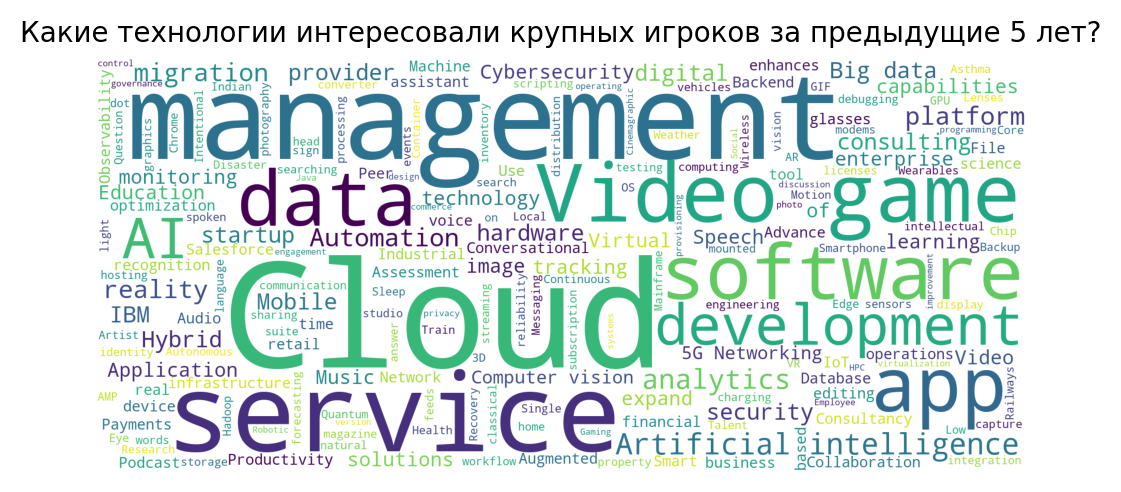

In [ ]:
wordcloud = WordCloud(background_color="white", width=1800, height=800, stopwords = ['Acquisition', 'and', 'for', 'to', 'in']).generate(text)

plt.figure(dpi = 200)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Какие технологии интересовали крупных игроков за предыдущие 5 лет?', {'fontsize' : 10})
plt.show()

### 2.3.4. **Интересы** крупнейших компаний

In [ ]:
text_microsoft = " ".join(business for business in big_player_data_2017.loc[big_player_data_2017['Parent Company'] == 'Microsoft'].Business.dropna())
text_google = " ".join(business for business in big_player_data_2017.loc[big_player_data_2017['Parent Company'] == 'Google'].Business.dropna())
text_apple = " ".join(business for business in big_player_data_2017.loc[big_player_data_2017['Parent Company'] == 'Apple'].Business.dropna())

In [ ]:
mc_cloud = WordCloud(background_color="white", width=1800, height=1000, stopwords = ['Acquisition', 'and', 'for', 'to', 'in']).generate(text_microsoft)
apl_cloud = WordCloud(background_color="white", width=1800, height=1000, stopwords = ['Acquisition', 'and', 'for', 'to', 'in']).generate(text_apple)
google_cloud = WordCloud(background_color="white", width=1800, height=1000, stopwords = ['Acquisition', 'and', 'for', 'to', 'in']).generate(text_google)

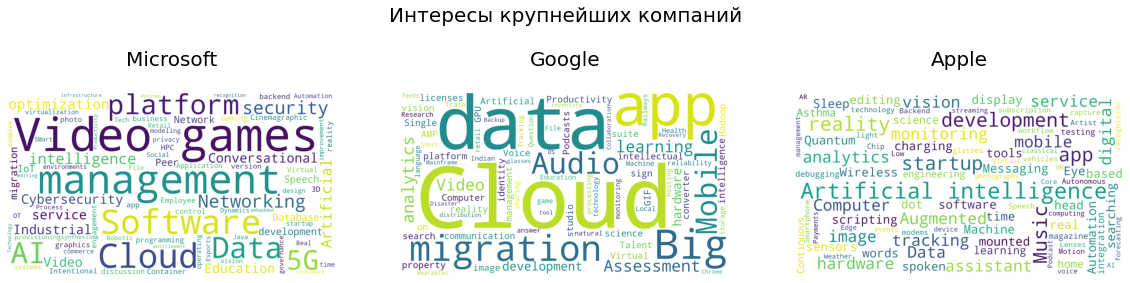

In [ ]:
f, axarr = plt.subplots(nrows=1,ncols=3, figsize = (20, 10))
plt.sca(axarr[0]); 
plt.imshow(mc_cloud); plt.title('Microsoft\n', {'fontsize' : 20})
plt.axis("off")
plt.sca(axarr[1]); 
plt.imshow(google_cloud); plt.title('Интересы крупнейших компаний\n\nGoogle\n', {'fontsize' : 20})
plt.axis("off")
plt.sca(axarr[2]); 
plt.imshow(apl_cloud); plt.title('Apple\n', {'fontsize' : 20})
plt.axis("off")
plt.show()

## 2.3. Обзор технологий, интересовавших за все время наблюдений

In [ ]:
text = " ".join(business for business in data.Business.dropna())
print ("Обнаружено {} слов.".format(len(text)))

Обнаружено 26408 слов.


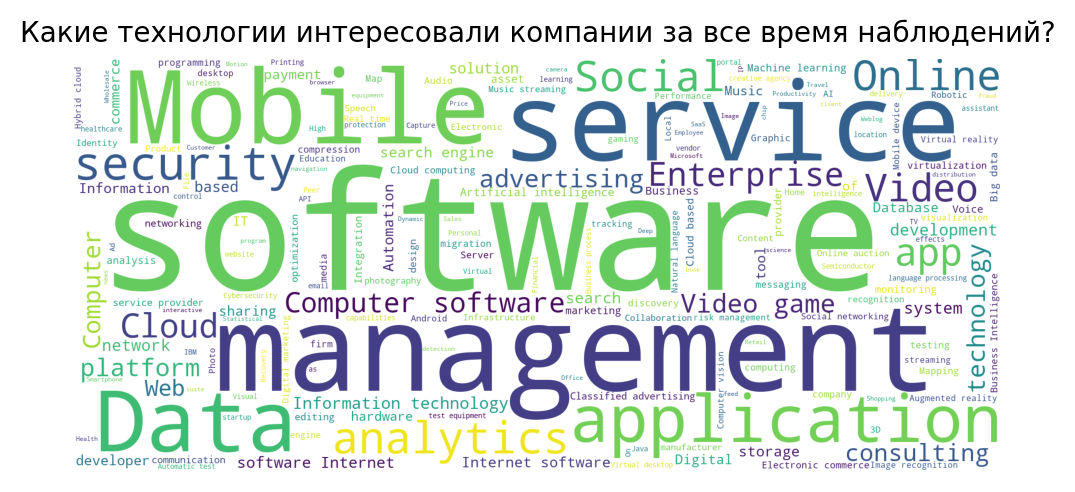

In [ ]:
wordcloud = WordCloud(background_color="white", stopwords = ['Acquisition', 'and', 'for', 'to', 'in'], width=1800, height=800).generate(text)

plt.figure(dpi = 200)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Какие технологии интересовали компании за все время наблюдений?', {'fontsize' : 10})
plt.show()

## 2.3. Короткое наблюдение за компанией Blackberry

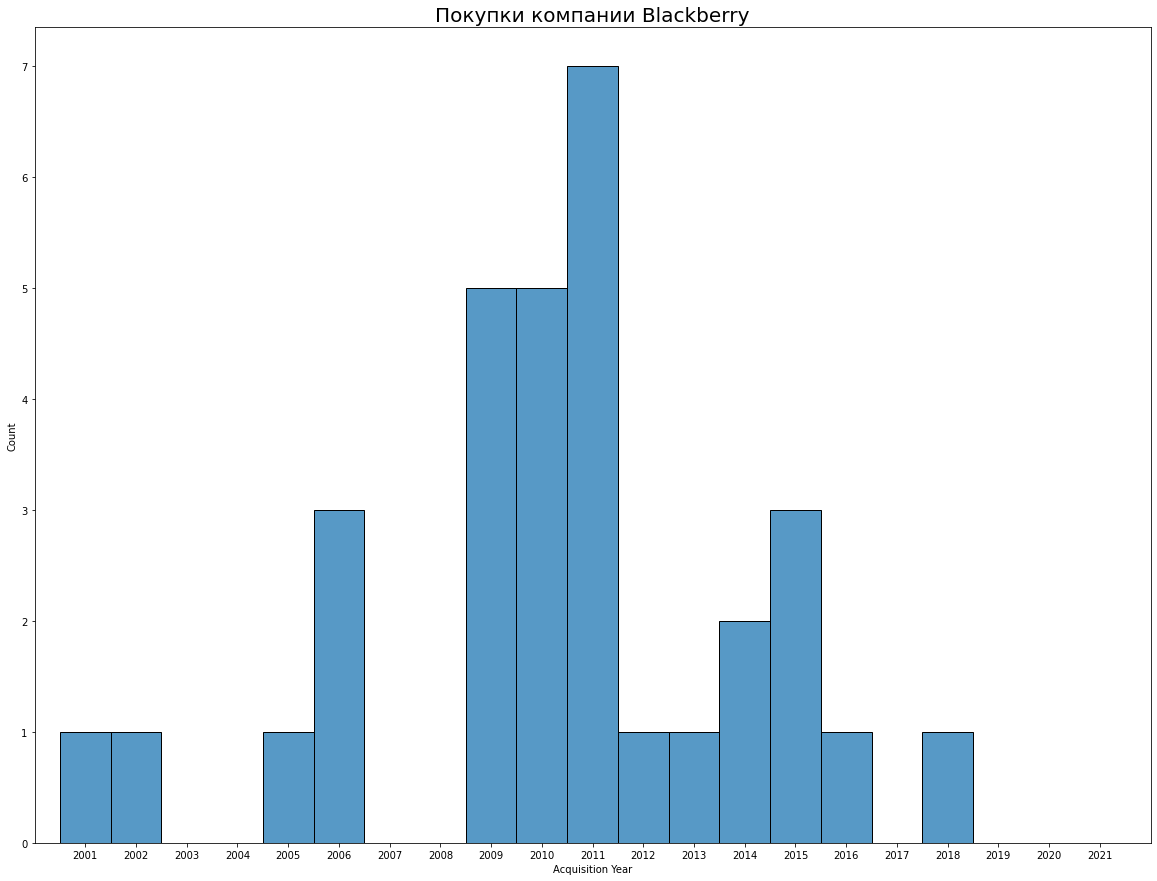

In [ ]:
dims = (20, 15)
fig, ax = plt.subplots(figsize=dims)
ax.set_xlim(2000, data['Acquisition Year'].max()+1)
fig1 = sns.histplot(x = data.loc[data['Parent Company'] == 'Blackberry', 'Acquisition Year'], ax = ax, binwidth = 1, multiple='stack', discrete = True, palette = 'colorblind')
fig1.set_xticks(range(2001, data['Acquisition Year'].max()+1, 1))
fig1.set_title('Покупки компании Blackberry', {'fontsize' : 20})
fig1

In [ ]:
data.loc[(data['Parent Company'] == 'Blackberry') & (data['Acquisition Year'] == 2018)]

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
958,959,Blackberry,2018,Nov,Cylance Inc.,Security firm,NaN,1400000000,NaN,NaN


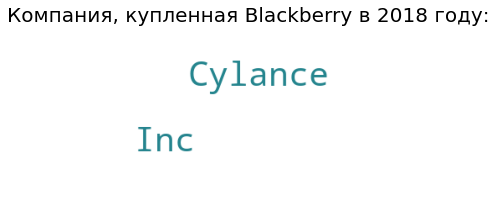

In [ ]:
# Libraries

import matplotlib.pyplot as plt
 
# Create a list of word
text=("Cylance Inc.") 

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis(False)
plt.title('Компания, купленная Blackberry в 2018 году:', {'fontsize' : 20})
plt.show()



------

# <center>ПОДВАЛ</center>

------



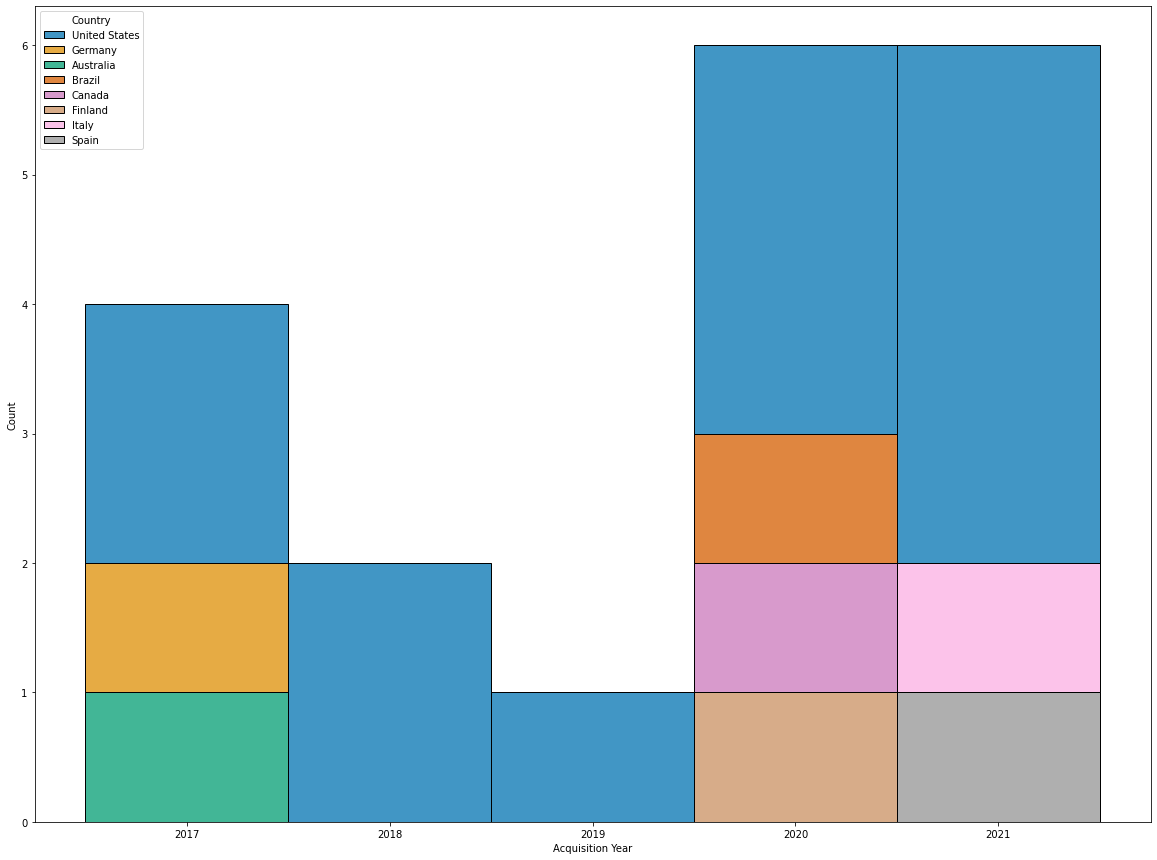

In [ ]:
# Ibm
dims = (20, 15)
fig, ax = plt.subplots(figsize=dims)
#ax.set_xlim(2016,big_player_data_2017['Acquisition Year'].max()+1)
fig1 = sns.histplot(x = big_player_data_2017.loc[data['Parent Company'] == 'Ibm', 'Acquisition Year'], ax = ax, binwidth = 1, hue = big_player_data_2017.loc[data['Parent Company'] == 'Ibm', 'Country'], multiple='stack', discrete = True, palette = 'colorblind')
#fig1.set_xticks(range(2017, big_player_data_2017['Acquisition Year'].max()+1, 1))
#fig1.set_title('Крупные игроки за предыдущие 5 лет', {'fontsize' : 20})
fig1

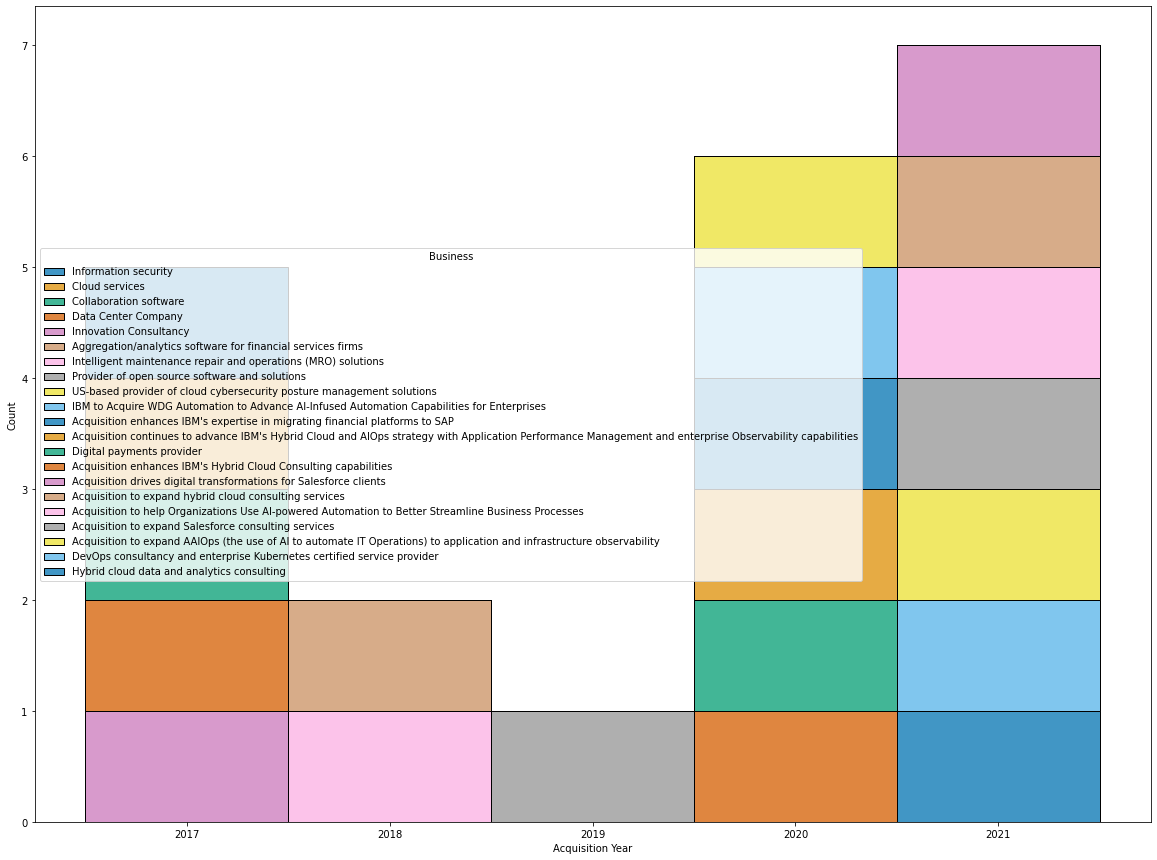

In [ ]:
# Ibm
dims = (20, 15)
fig, ax = plt.subplots(figsize=dims)
#ax.set_xlim(2016,big_player_data_2017['Acquisition Year'].max()+1)
fig1 = sns.histplot(x = big_player_data_2017.loc[data['Parent Company'] == 'Ibm', 'Acquisition Year'], ax = ax, binwidth = 1, hue = big_player_data_2017.loc[data['Parent Company'] == 'Ibm', 'Business'], multiple='stack', discrete = True, palette = 'colorblind')
#fig1.set_xticks(range(2017, big_player_data_2017['Acquisition Year'].max()+1, 1))
#fig1.set_title('Крупные игроки за предыдущие 5 лет', {'fontsize' : 20})
fig1

**Основная задача**: проследить, кто как активничал в разные пяти-десятилетия, и как они будут вести себя в будущем. Ктос амый агрессивный, кто самый осторожный мб???

In [ ]:
data['Acquisition Year'].value_counts()

2014    100
2011     95
2010     93
2015     93
2013     85
2016     76
2012     68
2006     63
2007     60
2017     60
2008     58
2018     58
2005     53
2019     45
2020     45
1999     41
2021     41
2004     38
2009     38
2001     29
2003     28
2002     28
1998     20
2000     20
1997     20
1996     15
1995     10
1994      8
1992      6
1988      5
1991      4
1993      4
1989      4
1965      2
1987      2
1990      2
1966      1
1973      1
1985      1
1962      1
1961      1
1959      1
1958      1
1957      1
1960      1
1982      1
Name: Acquisition Year, dtype: int64

Что интересно посмотреть:
- Кто в какие периоды (5 лет, 10 лет) больше всего покупал компаний, и кто в этот момент был на втором и третьем месте, то есть гистограмма по пятилетиям или десятилетиям с тремя колонками
- В какие сезоны больше всего компаний покупают? Типо летом мб? или осенью? И меняется ли этот тренд в течение времени?
- Какую **ИСТОРИЮ** можно рассказать?
- Кто за все время был самым жадным, а кто наоборот меньше всего покупал? Лучше в виде пирога показать, так будет понятно, какие компании вообще есть в датасете.
- Какой тренд сейчас? Можно ли понять, какая компания еще больше будет захватывать другие?
- Какая компания по годам больше всего купила?
- Какая покупка была самая дорога вообще? И какие были топ-10 покупок? Каких компаний и какие derived products они получили в итоге?
- Какая компания не жалеет деньги для покупки других? 
- Можно ли как-то понять, какая компания делала самые выгодные сделки? Типо крутость купленной компании на данный момент или крутость полученного derived products?
- **Каких действий я жду?** Допустим, что важно понять, в какую компанию надо вкладываться в плане акций и сотрудничества мб?

1. Вот, из каких колонок состоит датасет, и что эти колонки значат
2. Вот, сколько покупали компаний в разные годы
3. Вот, какая компания покупала больше всего
4. Вот самые крупные покупки за все время
5. Вот какие Business были больше всего востребованы за все время
5. Сезонность покупок не наблюдается. А сезонность покупок за 5 лет?
6. Сколько сейчас компании покупают? (тренд за 5 лет, с отдельными полосочками-компаниями) Можно ли предсказать, кто покупать в дальнейшем собирается?
7. Какой Business сейчас (5 лет) покупают?